# 範例1. 使用自動微分估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

In [3]:
# 載入套件
import numpy as np 
import tensorflow as tf 

## 定義訓練函數

In [4]:
# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [6]:
# 定義預測值函數
def predict(X):
    return w * X + b    

In [7]:
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0                                # 損失函數值
    for epoch in range(epochs):                   # 執行訓練週期
        with tf.GradientTape() as t:              # 自動微分
            t.watch(tf.constant(X))               # 宣告 TensorFlow 常數參與自動微分
            current_loss = loss(y, predict(X))    # 計算損失函數值
        
        dw, db = t.gradient(current_loss, [w, b]) # 取得 w, b 個別的梯度

        # 更新權重：新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        w.assign_sub(lr * dw) # w -= lr * dw
        b.assign_sub(lr * db) # b -= lr * db

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 

## 產生隨機資料

In [8]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [9]:
X

array([-0.2323179 ,  1.87984653, -0.50832769,  3.39403034, -7.41282696,
       12.09439708,  0.55975314,  0.46598153,  1.20773915, -2.66909496,
       -2.46511205, -0.1936885 , 10.02863258, 16.16722379, 11.78619174,
        3.55984356, 14.19116103,  1.85383699, 13.86396151, 15.83218406,
       18.05942438,  2.14030583,  7.06882294, 14.83976048, 19.65731125,
       11.78279871, 20.61156066,  6.67719391, 13.22155726,  8.4828124 ,
       15.37405274,  7.06084692, 25.52704704, 24.24885182, 12.52593575,
       23.34102837,  8.31833336,  9.2813563 , 18.55331683, 26.57960115,
       20.16977601, 24.40328116, 24.81782275, 13.31124174, 25.07356032,
       14.16465284, 21.00747223, 30.69742315, 27.08091865, 19.31891741,
       31.03486425, 22.41184357, 25.8259002 , 34.90079749, 33.32063371,
       23.09635811, 28.40042089, 25.77437837, 23.01869282, 23.58009967,
       35.729498  , 38.32476193, 33.77327272, 38.01797259, 30.12891529,
       32.65988464, 36.19252513, 34.28173396, 34.5489164 , 29.71

In [10]:
y

array([ 8.51536213, -2.57458054,  7.38524692,  6.26830225, 10.65193456,
        2.37341337,  6.62959831, -0.403032  ,  8.78542382,  5.11648744,
        8.04806212,  8.89755307, -3.08461016, -0.36680672,  4.97049634,
        0.43831398, 15.13735619,  1.86935957, 10.49624574,  7.69589475,
       17.97565443,  6.90208145, 15.5667083 , 13.61495529, 17.76419405,
       13.10543109,  9.34826495, 13.67934397,  4.6344077 ,  7.24760226,
       23.17198988, 23.67796672, 14.7396143 , 13.96445535, 26.5618217 ,
       17.17236816, 25.46478294, 21.98683218, 23.40919416, 25.67314934,
       19.99805727, 27.26088712, 30.13328336, 14.13959615, 26.80542895,
       19.50517363, 25.63357576, 18.76761717, 26.15666804, 22.21940267,
       35.0019156 , 32.02167829, 30.55207871, 30.29163064, 36.26575044,
       35.32061239, 19.85524159, 31.24427997, 29.35870671, 23.91092376,
       29.34118623, 33.12432126, 39.18485467, 26.78475721, 31.44668176,
       31.16047015, 30.63016802, 27.32350691, 26.2041626 , 39.23

## 執行訓練

In [11]:
# w、b 初始值均設為 0
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# w、b 的最佳解
print(f'w={w.numpy()}, b={b.numpy()}')

Epoch 0: Loss: 883.9701538085938
Epoch 1: Loss: 613.8113403320312
Epoch 2: Loss: 432.507568359375
Epoch 3: Loss: 310.8343811035156
Epoch 4: Loss: 229.17926025390625
Epoch 5: Loss: 174.38018798828125
Epoch 6: Loss: 137.6042938232422
Epoch 7: Loss: 112.92372131347656
Epoch 8: Loss: 96.36031341552734
Epoch 9: Loss: 85.24431610107422
Epoch 10: Loss: 77.78410339355469
Epoch 11: Loss: 72.77726745605469
Epoch 12: Loss: 69.4168930053711
Epoch 13: Loss: 67.16145324707031
Epoch 14: Loss: 65.64755249023438
Epoch 15: Loss: 64.63128662109375
Epoch 16: Loss: 63.9489860534668
Epoch 17: Loss: 63.490806579589844
Epoch 18: Loss: 63.183040618896484
Epoch 19: Loss: 62.97621154785156
Epoch 20: Loss: 62.83712387084961
Epoch 21: Loss: 62.743499755859375
Epoch 22: Loss: 62.680381774902344
Epoch 23: Loss: 62.63774490356445
Epoch 24: Loss: 62.60883331298828
Epoch 25: Loss: 62.58915710449219
Epoch 26: Loss: 62.575660705566406
Epoch 27: Loss: 62.56631851196289
Epoch 28: Loss: 62.559776306152344
Epoch 29: Loss: 62

## 顯示迴歸線

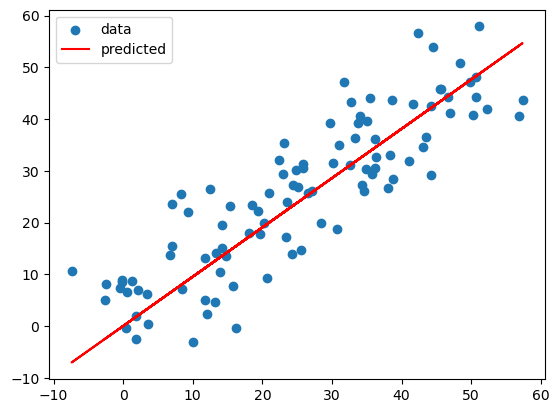

In [12]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()